FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series, it faithfully reproduces the characteristics of real players.

**The highlight of this kernel is Player Scouting**



<img src="https://media.altchar.com/prod/images/940_530/gm-3bb95784-b380-4bb3-988c-9725167b479e-fifa19.jpeg">


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ipywidgets
from ipywidgets import interact
import ipywidgets as widgets
!pip install apyori
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from math import pi

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=b8a7b5253238fe7f38c9c79230d000935ce2cd6d92dd4a5a9e8e7ae113b39c67
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
fifa_data = pd.read_csv('../input/fifa19/data.csv')

# Glimpse of the data

In [3]:
fifa_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


<img src="https://cdn.mos.cms.futurecdn.net/FSuDZonyzwLVmxMZnvdVBm.jpg">


In [4]:
fifa_data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
fifa_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# Data Cleaning

Dropping columns

In [6]:
fifa_data = fifa_data.drop(columns=["Photo","Flag","Club Logo","Unnamed: 0","Body Type","Special","Real Face", "ID", "LS", "ST", "RS", 
                        "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", 
                        "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB"],axis=1)

Handling missing values

In [7]:
fifa_data.isnull().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl   

In [8]:
fifa_data["Club"].fillna("Free Agent", inplace = True)
fifa_data["Release Clause"].fillna("No Release Clause", inplace = True)
fifa_data = fifa_data.dropna(axis=0, subset=['Position'])
fifa_data["Joined"].fillna("N/A", inplace = True)
fifa_data["Loaned From"].fillna("Not on loan", inplace = True)
fifa_data["Contract Valid Until"].fillna("Free Agent", inplace = True)

In [9]:
fifa_data.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

# Data Visualization

Player overall histogram

(array([ 192.,  994., 2360., 4678., 4286., 3569., 1513.,  445.,   96.,
          14.]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <BarContainer object of 10 artists>)

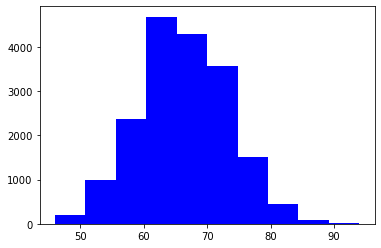

In [10]:
plt.hist(fifa_data['Overall'], color='blue') 

Player potential histogram

(array([  16.,  100.,  989., 2958., 5628., 4905., 2181., 1096.,  245.,
          29.]),
 array([48. , 52.7, 57.4, 62.1, 66.8, 71.5, 76.2, 80.9, 85.6, 90.3, 95. ]),
 <BarContainer object of 10 artists>)

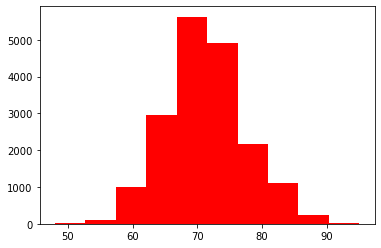

In [11]:
plt.hist(fifa_data['Potential'], color='red')

Player Age vs Overall vs Potential

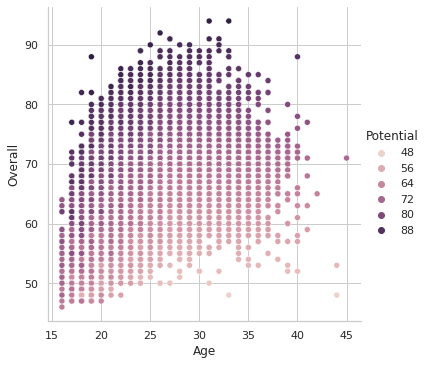

In [12]:
sns.set(style="whitegrid")
sns.relplot(
    data = fifa_data,
    x="Age",y="Overall",hue="Potential")

No. of players for each position

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Players')

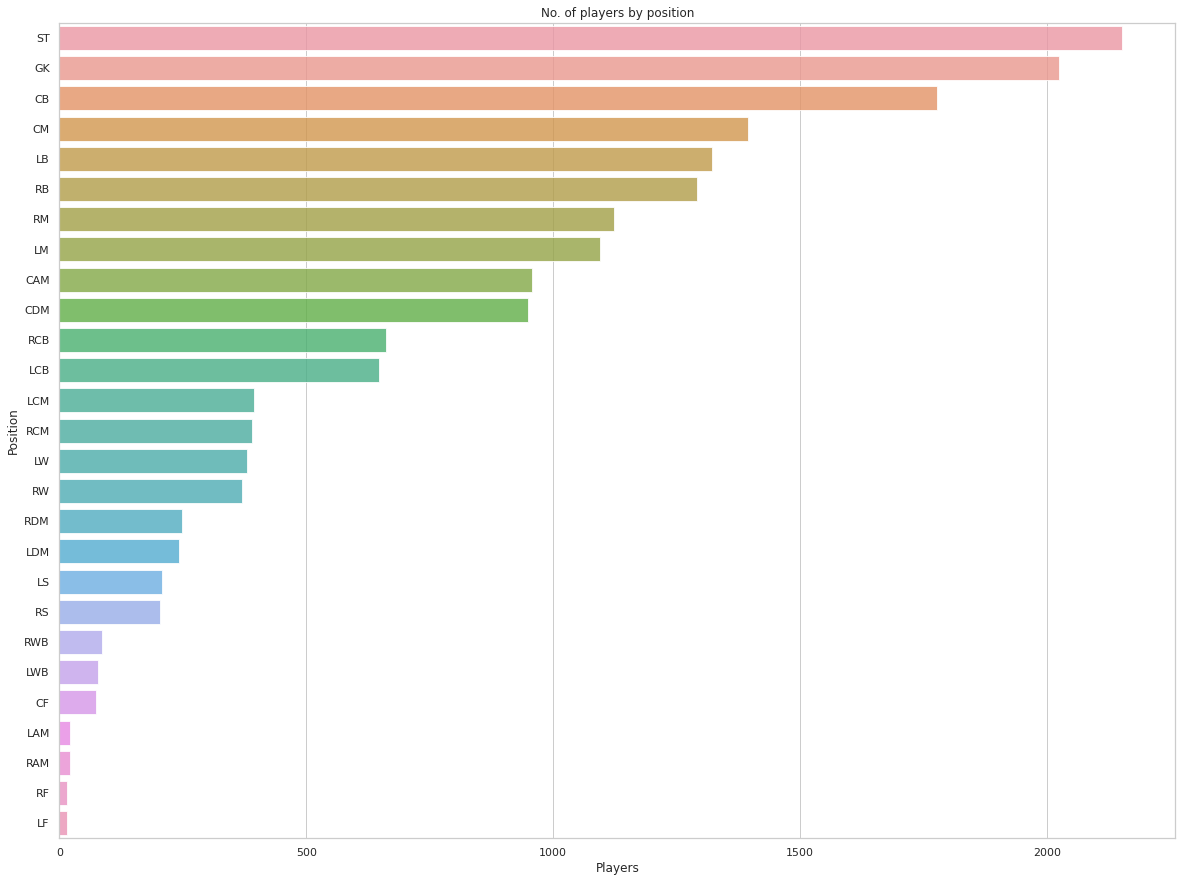

In [13]:
position_count = fifa_data['Position'].value_counts()
plt.figure(figsize=(20,15))
sns.barplot(position_count.values,position_count.index,  alpha=0.8)
plt.title('No. of players by position')
plt.ylabel('Position', fontsize=12)
plt.xlabel('Players', fontsize=12)

Player nationality 

In [14]:
fifa_data.Nationality.nunique()

164

The game features players from 164 nations


**Top 20 nations with most players**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Players')

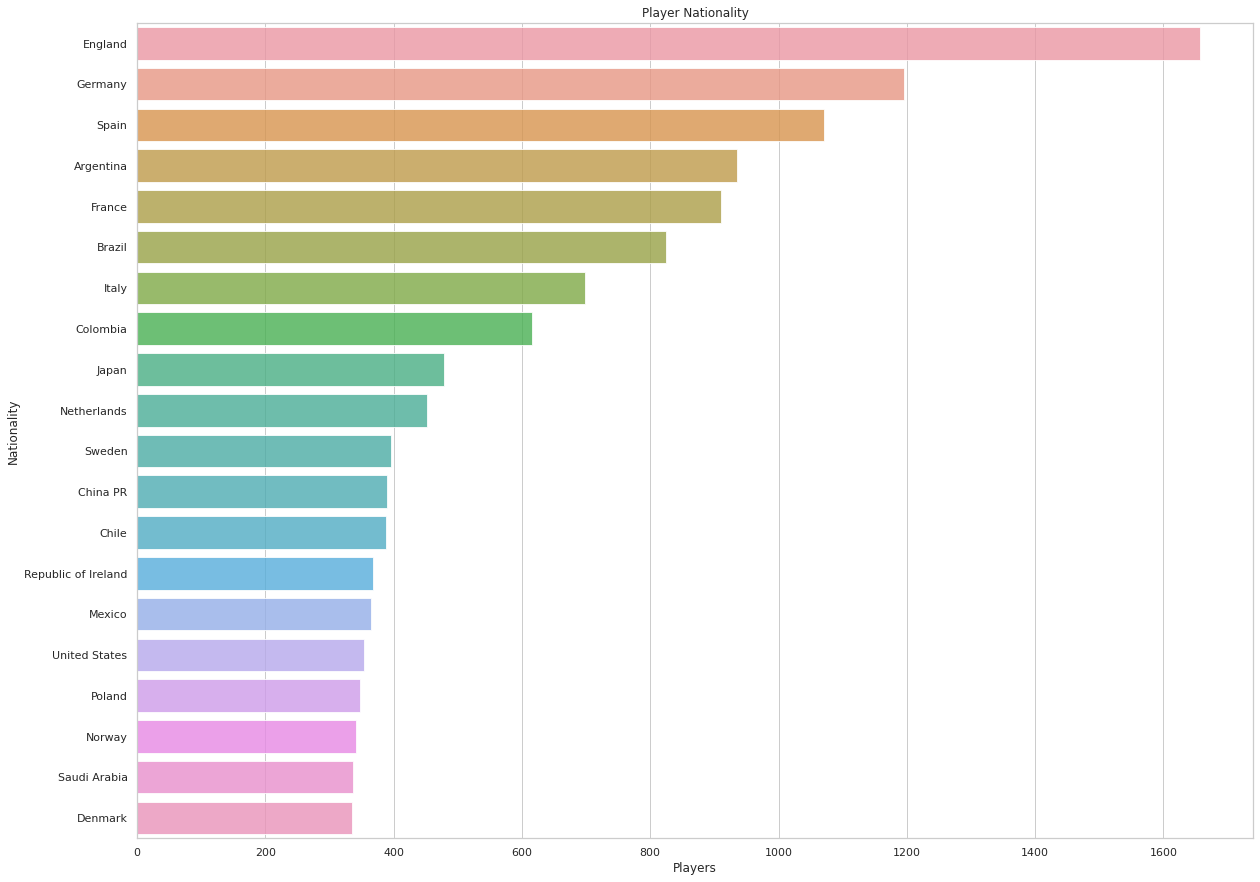

In [15]:
nation_count = fifa_data['Nationality'].value_counts()
nation_count = nation_count[0:20]
plt.figure(figsize=(20,15))
sns.barplot(nation_count.values,nation_count.index,  alpha=0.8)
plt.title('Player Nationality')
plt.ylabel('Nationality', fontsize=12)
plt.xlabel('Players', fontsize=12)

Club players

In [16]:
fifa_data.Club.nunique()

652

The game has 652 players

**Clubs with most players**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Players')

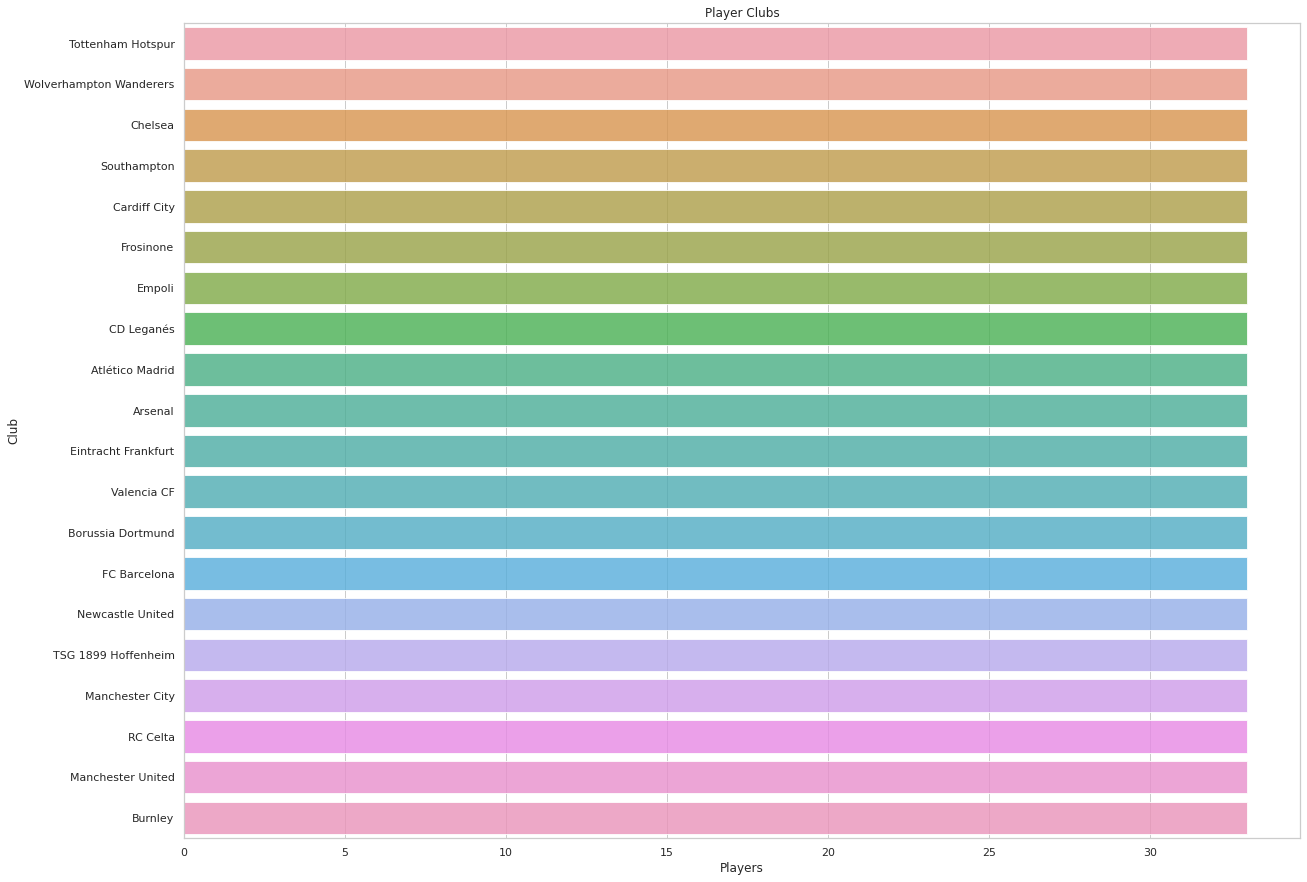

In [17]:
club_count = fifa_data['Club'].value_counts()
club_count = club_count[1:21]
plt.figure(figsize=(20,15))
sns.barplot(club_count.values,club_count.index,  alpha=0.8)
plt.title('Player Clubs')
plt.ylabel('Club', fontsize=12)
plt.xlabel('Players', fontsize=12)

Heatmap

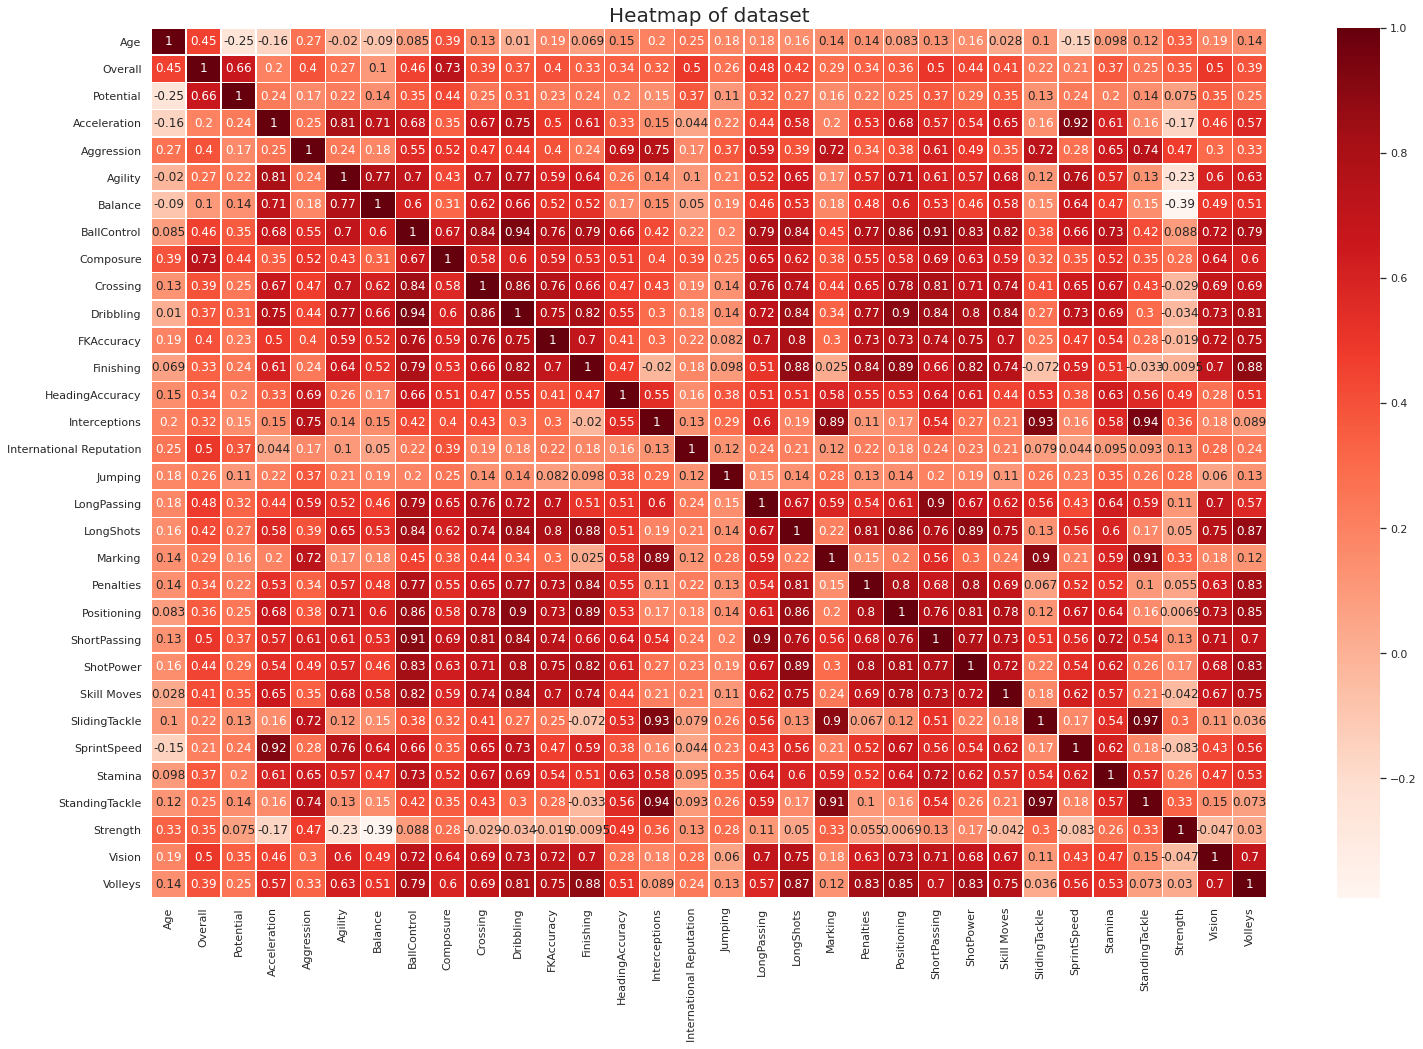

In [18]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(fifa_data[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# League Analysis

Adding the league in which the player plays on the basis of club

In [19]:
SAF = ["Aldosivi", "Argentinos Jrs.", "Atlético Tucumán", "Banfield","Belgrano","Buenos Aires","Colón","Defensa","Estudiantes","Gimnasia","Godoy Cruz",
"Huracán","Independiente","Lanús","Newell's","Patronato","Racing Club","River Plate","Rosario Central","San Lorenzo","San Martín","SM Tucumán","Talleres",
"Tigre","Unión","Vélez Sarsfield", "Boca Juniors", "Club Atlético Huracán"]
HYUNDAI_A_LEAGUE = ["Adelaide United","Brisbane Roar","Central Coast","Melb. Victory","Melbourne City","Newcastle Jets","Perth Glory","Sydney FC","Well. Phoenix","WS Wanderers",
                    "Melbourne Victory"]
O_BUNDESLIGA = ["Admira Wacker","FK Austria Wien","Innsbruck","LASK Linz","RB Salzburg","SCR Altach","SK Rapid Wien","SK Sturm Graz","SKN St. Pölten","SV Mattersburg",
                "TSV Hartberg","Wolfsberger AC", "FC Red Bull Salzburg"]
PRO_LEAGUE = ["Cercle Brugge","Club Brugge","Excel Mouscron","KAA Gent","KAS Eupen","KRC Genk","KV Kortrijk","KV Oostende","Royal Antwerp FC","RSC Anderlecht",
              "Sint-Truiden","Sp. Charleroi","Sport. Lokeren","Standard Liège","Waasl. Beveren","Zulte-Waregem", "Club Brugge KV", "Standard de Liège"]
LIGA_DO_BRASIL = ["América""Atl. Paranaense","Atlético Mineiro","Bahia","Botafogo","Ceará SC","Chapecoense","Cruzeiro","Fluminense","Grêmio","Internacional","Paraná",
                  "Santos","Sport","Vitória"]
CAMP_SCOTIABANK = ["Audax Italiano","CD Antofagasta","CD Huachipato","CD O'Higgins","CD Palestino","CD Viñazur","Curicó Unido","Depor. Iquique","Deportes Temuco",
                   "Everton de Viña","San Luis","Uni. Católica","Uni. Concepción","Uni. de Chile","Unión Española","Unión La Calera"]
CSL = ["Beijing Guoan","Beijing Renhe","Changchun Yatai","Chongqing SWM","Dalian Yifang","Guangzhou","Guangzhou R&F","Guizhou Hengfeng","Hebei CFFC","Henan Jianye",
       "Jiangsu Suning","Shandong Luneng","Shanghai Shenhua","Shanghai SIPG","Tianjin Quanjian","Tianjin TEDA", "Guangzhou Evergrande Taobao FC", "Dalian YiFang FC",
       "Shanghai SIPG FC", "Beijing Sinobo Guoan FC", "Tianjin Quanjian FC", "Guangzhou R&F; FC", "Beijing Renhe FC", "Hebei China Fortune FC", "Jiangsu Suning FC",
       "Shanghai Greenland Shenhua FC", "Changchun Yatai FC", "Guizhou Hengfeng FC"]
LIGA_DIMAYOR = ["Al. Petrolera","América de Cali","Atl. Bucaramanga","Atl. Nacional","Atlético Huila","Boyacá Chicó","Deportes Tolima","Deportivo Cali",
                "Deportivo Pasto","Envigado","Ind. Santa Fe","Indep. Medellín","Jaguares","Junior","La Equidad","Leones","Millonarios","Once Caldas","Patriotas",
                "Rionegro Águilas"]
SUPERLIGA = ["Aalborg BK","Aarhus GF","AC Horsens","Brøndby IF","Esbjerg fB","FC København","FC Midtjylland","FC Nordsjælland","Hobro IK","Odense BK","Randers FC",
             "SønderjyskE","Vejle Boldklub","Vendsyssel FF"]
PREMIER_LEAGUE = ["Arsenal","Bournemouth","Brighton","Burnley","Cardiff City","Chelsea","Crystal Palace","Everton","Fulham","Huddersfield","Leicester City",
                  "Liverpool","Manchester City","Manchester United","Newcastle Utd","Southampton","Spurs","Watford","West Ham","Wolves", "Tottenham Hotspur", 
                  "West Ham United", "Wolverhampton Wanderers", "Brighton & Hove Albion", "Newcastle United", "Huddersfield Town"]
EFL_CHAMPIONSHIP = ["Aston Villa","Birmingham City","Blackburn Rovers","Bolton","Brentford","Bristol City","Derby County","Hull City","Ipswich","Leeds United",
                    "Middlesbrough","Millwall","Norwich","Nott'm Forest","Preston","QPR","Reading","Rotherham Utd","Sheffield Utd","Sheffield Wed","Stoke City",
                    "Swansea City","West Brom","Wigan Athletic", "West Bromwich Albion"]
EFL_LEAGUE_ONE = ["Accrington","AFC Wimbledon","Barnsley","Blackpool","Bradford City","Bristol Rovers","Burton Albion","Charlton Ath","Coventry City","Doncaster",
                  "Fleetwood Town","Gillingham","Luton Town","Oxford United","Peterborough","Plymouth Argyle","Portsmouth","Rochdale","Scunthorpe Utd","Shrewsbury",
                  "Southend United","Sunderland","Walsall","Wycombe"]
EFL_LEAGUE_TWO = ["Bury","Cambridge Utd","Carlisle United","Cheltenham Town","Colchester","Crawley Town","Crewe Alexandra","Exeter City",
                  "Forest Green","Grimsby Town","Lincoln City","Macclesfield","Mansfield Town","MK Dons","Morecambe","Newport County","Northampton",
                  "Notts County","Oldham Athletic","Port Vale","Stevenage","Swindon Town","Tranmere Rovers","Yeovil Town"]
LIGUE_1 = ["Amiens SC","Angers SCO","AS Monaco","ASSE","Dijon FCO","EA Guingamp","FC Nantes","Girondins de Bx","LOSC Lille","Montpellier HSC","Nîmes Olympique",
           "OGC Nice","OL","OM","Paris","RC Strasbourg","SM Caen","Stade de Reims","Stade Rennais","Toulouse FC", "Paris Saint-Germain", "Olympique Lyonnais","Olympique de Marseille",
           "AS Saint-Étienne", "Stade Rennais FC", "Stade Malherbe Caen", "Toulouse Football Club", "FC Girondins de Bordeaux"]
LIGUE_2 = ["AC Ajaccio","AJ Auxerre","AS Béziers","Chamois FC","Clermont Foot","ESTAC Troyes","FC Lorient","FC Metz","FCSM","Gazélec Ajaccio","Grenoble Foot",
           "Havre AC","La Berrichonne","Nancy","Paris FC","RC Lens","Red Star FC","Stade Brestois","US Orléans","Valenciennes FC"]
BUNDESLIGA = ["1. FC Nürnberg","1. FSV Mainz 05","Dortmund","Düsseldorf","FC Augsburg","FC Bayern","Frankfurt","Hannover 96","Hertha BSC","Leverkusen","M'gladbach",
              "RB Leipzig","SC Freiburg","Schalke","TSG Hoffenheim","VfB Stuttgart","VfL Wolfsburg","Werder Bremen", "FC Bayern München", "Borussia Dortmund","FC Schalke 04",
              "Bayer 04 Leverkusen", "1. FC Köln", "TSG 1899 Hoffenheim", "Borussia Mönchengladbach", "SV Werder Bremen", "Eintracht Frankfurt"]
BUNDESLIGA_2 = ["Aue","Bielefeld","Bochum","Darmstadt","Dresden","Duisburg","Fürth","Hamburg","Heidenheim","Ingolstadt","Kiel","Köln","Magdeburg","Paderborn","Regensburg",
                "Sandhausen","St. Pauli","Union Berlin", "Hamburger SV"]
Three_LIGA = ["1860 München","Braunschweig","Carl Zeiss Jena","Energie Cottbus","Fortuna Köln","FSV Zwickau","Hallescher FC","Hansa Rostock","Kaiserslautern","Karlsruher SC",
              "KFC Uerdingen","Preußen Münster","S. Großaspach","Sportfreunde Lotte","SV Meppen","SV Wehen","Unterhaching","VfL Osnabrück","VfR Aalen","Würzburg"]
SSE_AIRTRICITY_LEAGUE = ["Bohemian FC","Bray Wanderers","Cork City","Derry City","Dundalk","Limerick FC","Shamrock Rovers","Sligo Rovers","St. Pats","Waterford FC"]
SERIE_A_TIM = ["Atalanta","Bologna","Cagliari","Chievo Verona","Empoli","Fiorentina","Frosinone","Genoa","Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma",
               "Sampdoria","Sassuolo","SPAL","Torino","Udinese"]
CALCIO_B = ["Ascoli","Benevento","Brescia", "Carpi", "Cittadella", "Cosenza", "Cremona", "Crotone","Foggia", "Hellas Verona","La Spezia", "Lecce", "Livorno", "Padova", 
            "Palermo", "Perugia", "Pescara", "Salerno","Venezia"]
MEIJI_YASUDAJ1 = ["Cerezo Osaka","F.C. Tokyo","Gamba Osaka","H.Consa.Sapporo","Júbilo Iwata","Kashima Antlers","Kashiwa Reysol","Kawasaki-F","Nagoya Grampus","Sagan Tosu",
                  "Shimizu S-Pulse","S-Hiroshima","Shonan Bellmare","Urawa Reds","Vegalta Sendai","Vissel Kobe","V-Varen Nagasaki","Yokohama F･M"]
KLEAGUE1 = ["Daegu FC","FC Seoul","Gangwon FC","Gyeongnam FC","Incheon United","Jeju United","Jeonbuk Hyundai","Jeonnam Dragons","Pohang Steelers","Sangju Sangmu",
            "Suwon Samsung","Ulsan Hyundai"]
LIGA_BANCOMER_MX = ["América","Atlas","Cruz Azul","Guadalajara","León","Lobos","Monarcas Morelia","Monterrey","Necaxa","Pachuca","Puebla","Querétaro","Santos Laguna",
                    "Tigres","Tijuana","Toluca","U.N.A.M.","Veracruz", "Tigres U.A.N.L.", "América FC (Minas Gerais)"]
EREDIVISIE = ["ADO Den Haag","Ajax","AZ","De Graafschap","Excelsior","FC Emmen","FC Groningen","FC Utrecht","Feyenoord","Fortuna Sittard","Heracles Almelo",
              "NAC Breda","PEC Zwolle","PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"]
ELITESERIEN = ["FK Bodø/Glimt","FK Haugesund","IK Start","Kristiansund","Lillestrøm SK","Molde FK","Odds BK","Ranheim Fotball","Rosenborg BK","Sandefjord","Sarpsborg 08 FF",
               "SK Brann","Stabæk Fotball","Strømsgodset IF","Tromsø IL","Vålerenga Fotball"]
EKSTRAKLASA = ["Arka Gdynia","Cracovia","Górnik Zabrze","Jagiellonia","Korona Kielce","Lech Poznań","Lechia Gdańsk","Legia Warszawa","Miedź Legnica","Piast Gliwice",
               "Pogoń Szczecin","Śląsk Wrocław","Wisła Kraków","Wisła Płock","Z. Sosnowiec","Zagłębie Lubin"]
LIGA_NOS = ["Belenenses","Boavista FC","CD Feirense","CD Tondela","Desportivo Aves","FC Porto","Funchal","GD Chaves","Marítimo","Moreirense FC","Portimonense SC",
            "Rio Ave FC","Santa Clara","SC Braga","SL Benfica","Sporting CP","V. Guimarães","V. Setúbal"]
REST_OF_WORLD = ["AEK Athens","CSKA Moscow","Dinamo Zagreb","Dynamo Kyiv","HJK Helsinki","Kaizer Chiefs","Lokomotiv Moscow","Olympiacos CFP","Orlando Pirates",
                 "Panathinaikos","PAOK","Shakhtar Donetsk","Slavia Praha","Sparta Praha","Spartak Moscow","Viktoria Plzeň", "PFC CSKA Moscow"]
SAUDI_PROFESSIONAL_LEAGUE = ["Al Ahli","Al Batin","Al Faisaly","Al Fateh","Al Fayha","Al Hazem","Al Hilal","Al Ittihad","Al Nassr","Al Qadisiyah","Al Raed",
                             "Al Shabab","Al Wehda","Al Taawoun","Ettifaq FC","Ohod Club"]
SCOTTISH_PREMIERSHIP = ["Aberdeen","Celtic","Dundee FC","Hamilton","Hearts","Hibernian","Kilmarnock","Livingston","Motherwell","Rangers","St. Johnstone","St. Mirren"]
LALIGA_SANTANDER = ["Athletic Club","Atlético Madrid","CD Leganés","D. Alavés","FC Barcelona","Getafe CF","Girona FC","Levante UD","R. Valladolid CF","Rayo Vallecano",
          "RC Celta","RCD Espanyol","Real Betis","Real Madrid","Real Sociedad","SD Eibar","SD Huesca","Sevilla FC","Valencia CF","Villarreal CF", "Athletic Club de Bilbao",
          "Deportivo Alavés", "Real Valladolid CF"]
LALIGA_123 = ["AD Alcorcón","Albacete BP","CA Osasuna","Cádiz CF","CD Lugo","CD Numancia","CD Tenerife","CF Rayo","CF Reus","Córdoba CF","Elche CF",
              "Extremadura UD","Granada CF","Málaga CF","Nàstic","R. Oviedo","R. Sporting","R. Zaragoza","RC Deportivo","RCD Mallorca","UD Almería","UD Las Palmas"]
ALLSVENSKAN = ["AIK","BK Häcken","Brommapojkarna","Dalkurd FF","Djurgårdens IF","GIF Sundsvall","Hammarby IF","IF Elfsborg","IFK Göteborg","IFK Norrköping","IK Sirius",
               "Kalmar FF","Malmö FF","Örebro SK","Östersunds FK","Trelleborgs FF"]
RAIFFEISEN_SUPER_LEAGUE = ["BSC Young Boys","FC Basel","FC Lugano","FC Luzern","FC Sion","FC St. Gallen","FC Thun","FC Zürich","Grasshopper Club","Neuchâtel Xamax", "FC Basel 1893"]
SUPER_LIG = ["Akhisarspor","Alanyaspor","Antalyaspor","Başakşehir","BB Erzurumspor","Beşiktaş","Bursaspor","Çaykur Rizespor","Fenerbahçe","Galatasaray","Göztepe",
             "Kasimpaşa","Kayserispor","Konyaspor","MKE Ankaragücü","Sivasspor","Trabzonspor","Yeni Malatyaspor", "Beşiktaş JK", "Medipol Başakşehir FK", "Galatasaray SK", 
             "Fenerbahçe SK", "Kasimpaşa SK"]
MLS = ["Atlanta United","Chicago Fire","Colorado Rapids","Columbus Crew SC","D.C. United","FC Dallas","Houston Dynamo","Impact Montréal","LAFC","LA Galaxy","Minnesota United",
       "New England","New York City FC","NY Red Bulls","Orlando City","Philadelphia","Portland Timbers","Real Salt Lake","Seattle Sounders","SJ Earthquakes","Sporting KC",
       "Toronto FC","Whitecaps FC", "Los Angeles FC", "Montreal Impact", "DC United", "Seattle Sounders FC"]

In [20]:
conditions = [(fifa_data['Club'].isin(SAF)),
              (fifa_data['Club'].isin(HYUNDAI_A_LEAGUE)),
              (fifa_data['Club'].isin(O_BUNDESLIGA)),
              (fifa_data['Club'].isin(PRO_LEAGUE)),
              (fifa_data['Club'].isin(LIGA_DO_BRASIL)),
              (fifa_data['Club'].isin(CAMP_SCOTIABANK)),
              (fifa_data['Club'].isin(CSL)),
              (fifa_data['Club'].isin(LIGA_DIMAYOR)),
              (fifa_data['Club'].isin(SUPERLIGA)),
              (fifa_data['Club'].isin(PREMIER_LEAGUE)),
              (fifa_data['Club'].isin(EFL_CHAMPIONSHIP)),
              (fifa_data['Club'].isin(EFL_LEAGUE_ONE)),
              (fifa_data['Club'].isin(EFL_LEAGUE_TWO)),
              (fifa_data['Club'].isin(LIGUE_1)),
              (fifa_data['Club'].isin(LIGUE_2)),
              (fifa_data['Club'].isin(BUNDESLIGA)),
              (fifa_data['Club'].isin(BUNDESLIGA_2)),
              (fifa_data['Club'].isin(Three_LIGA)),
              (fifa_data['Club'].isin(SSE_AIRTRICITY_LEAGUE)),
              (fifa_data['Club'].isin(SERIE_A_TIM)),
              (fifa_data['Club'].isin(CALCIO_B)),
              (fifa_data['Club'].isin(MEIJI_YASUDAJ1)),
              (fifa_data['Club'].isin(KLEAGUE1)),
              (fifa_data['Club'].isin(LIGA_BANCOMER_MX)),
              (fifa_data['Club'].isin(EREDIVISIE)),
              (fifa_data['Club'].isin(ELITESERIEN)),
              (fifa_data['Club'].isin(EKSTRAKLASA)),
              (fifa_data['Club'].isin(LIGA_NOS)),
              (fifa_data['Club'].isin(REST_OF_WORLD)),
              (fifa_data['Club'].isin(SAUDI_PROFESSIONAL_LEAGUE)),
              (fifa_data['Club'].isin(SCOTTISH_PREMIERSHIP)),
              (fifa_data['Club'].isin(LALIGA_SANTANDER)),
              (fifa_data['Club'].isin(LALIGA_123)),
              (fifa_data['Club'].isin(ALLSVENSKAN)),
              (fifa_data['Club'].isin(RAIFFEISEN_SUPER_LEAGUE)),
              (fifa_data['Club'].isin(SUPER_LIG)),
              (fifa_data['Club'].isin(MLS))
]
values = ['SAF', 'HYUNDAI A-LEAGUE', 'Ö. BUNDESLIGA', 'PRO LEAGUE', 'LIGA DO BRASIL', 'CAMP. SCOTIABANK', 'CSL', 'LIGA DIMAYOR', 'SUPERLIGA', 'PREMIER LEAGUE', 'EFL CHAMPIONSHIP',
          'EFL LEAGUE ONE', 'EFL LEAGUE TWO', 'LIGUE 1 CONFORAMA', "DOMINO'S LIGUE 2", 'BUNDESLIGA', 'BUNDESLIGA 2', '3. LIGA', 'SSE AIRTRICITY LEAGUE', 'SERIE A TIM', 'CALCIO B',
          'MEIJI YASUDA J1', 'K-LEAGUE 1', 'LIGA BANCOMER MX', 'EREDIVISIE', 'ELITESERIEN', 'EKSTRAKLASA', 'LIGA NOS', 'REST OF WORLD', 'SAUDI PROFESSIONAL LEAGUE', 'SCOTTISH PREMIERSHIP',
          'LALIGA SANTANDER', 'LALIGA 1 | 2 | 3', 'ALLSVENSKAN', 'RAIFFEISEN SUPER LEAGUE', 'SÜPER LIG', 'MLS'
          ]

fifa_data['League'] = np.select(conditions, values)

In [21]:
fifa_data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,EFL LEAGUE TWO
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,ALLSVENSKAN
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,EFL LEAGUE TWO


Top 5 leagues on the basis of no. of players (Top 5 in terms of quality as well 😜 )

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'League')

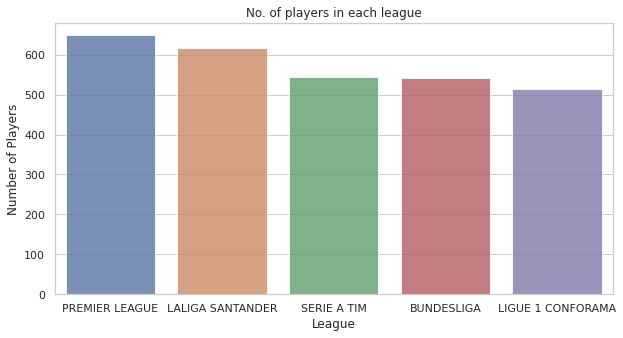

In [22]:
league_count = fifa_data['League'].value_counts()
league_count = league_count[1:6]
plt.figure(figsize=(10,5))
sns.barplot(league_count.index, league_count.values, alpha=0.8)
plt.title('No. of players in each league')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('League', fontsize=12)

<img src="https://fmp247.com/wp-content/uploads/2020/01/Untitled-1-copy.jpg">


# Financial Analysis

In [23]:
cal_df = fifa_data[['Name', 'Age','Overall', 'Potential', 'Club', 'Value',
       'Wage','League' ]]
cal_df

,Name,Age,Overall,Potential,Club,Value,Wage,League
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,LALIGA SANTANDER
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,SERIE A TIM
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,LIGUE 1 CONFORAMA
3,De Gea,27,91,93,Manchester United,€72M,€260K,PREMIER LEAGUE
4,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,PREMIER LEAGUE
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,Crewe Alexandra,€60K,€1K,EFL LEAGUE TWO
18203,N. Christoffersson,19,47,63,Trelleborgs FF,€60K,€1K,ALLSVENSKAN
18204,B. Worman,16,47,67,Cambridge United,€60K,€1K,0
18205,D. Walker-Rice,17,47,66,Tranmere Rovers,€60K,€1K,EFL LEAGUE TWO


Converting data in the value and wage column to integer 

In [24]:
cal_df['Value'] = cal_df['Value'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)
cal_df['Wage'] = cal_df['Wage'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Calculating annual wage of players

In [25]:
cal_df["A_wage"] = 48*cal_df["Wage"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
cal_df2 = cal_df.groupby(["League"]).Value.sum().reset_index()
cal_df2 = cal_df2.sort_values('Value', ascending=False)

In [27]:
print(cal_df2['Value'].sum())

43874529950


Combined valuation of all players in the game is more than €43 billion

In [28]:
cal_df2 = cal_df2.drop(0)
cal_df2 = cal_df2.reset_index()
cal_df2 = cal_df2.drop(columns=['index'], axis=1)

Player valuation according to league

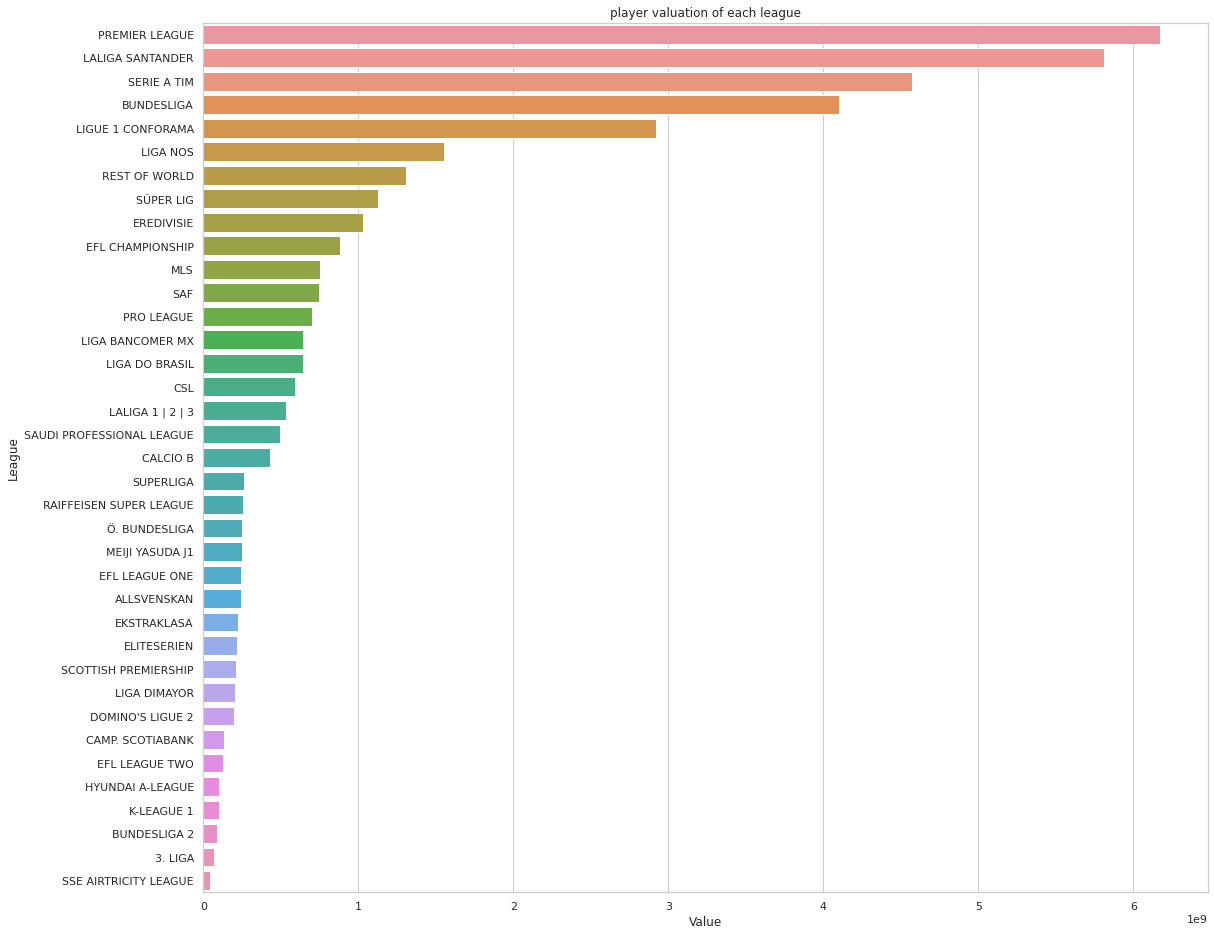

In [29]:
f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x="Value", y="League", data=cal_df2)
plt.title('player valuation of each league')
plt.show()

In [30]:
cal_df3 = cal_df.groupby(["League"]).A_wage.sum().reset_index()
cal_df3 = cal_df3.sort_values('A_wage', ascending=False)
cal_df3

,League,A_wage
26,PREMIER LEAGUE,1633920000
0,0,1140720000
18,LALIGA SANTANDER,1010160000
33,SERIE A TIM,897168000
3,BUNDESLIGA,654480000
23,LIGUE 1 CONFORAMA,537744000
9,EFL CHAMPIONSHIP,339696000
36,SÜPER LIG,302784000
31,SAUDI PROFESSIONAL LEAGUE,178704000
19,LIGA BANCOMER MX,169488000


In [31]:
print(cal_df3['A_wage'].sum()) 

8500656000


More than €8.5 billion is spend on player wages annually 

In [32]:
cal_df3 = cal_df3.drop(0)
cal_df3 = cal_df3.reset_index()
cal_df3 = cal_df3.drop(columns=['index'], axis=1)


Player wages payed by various leagues

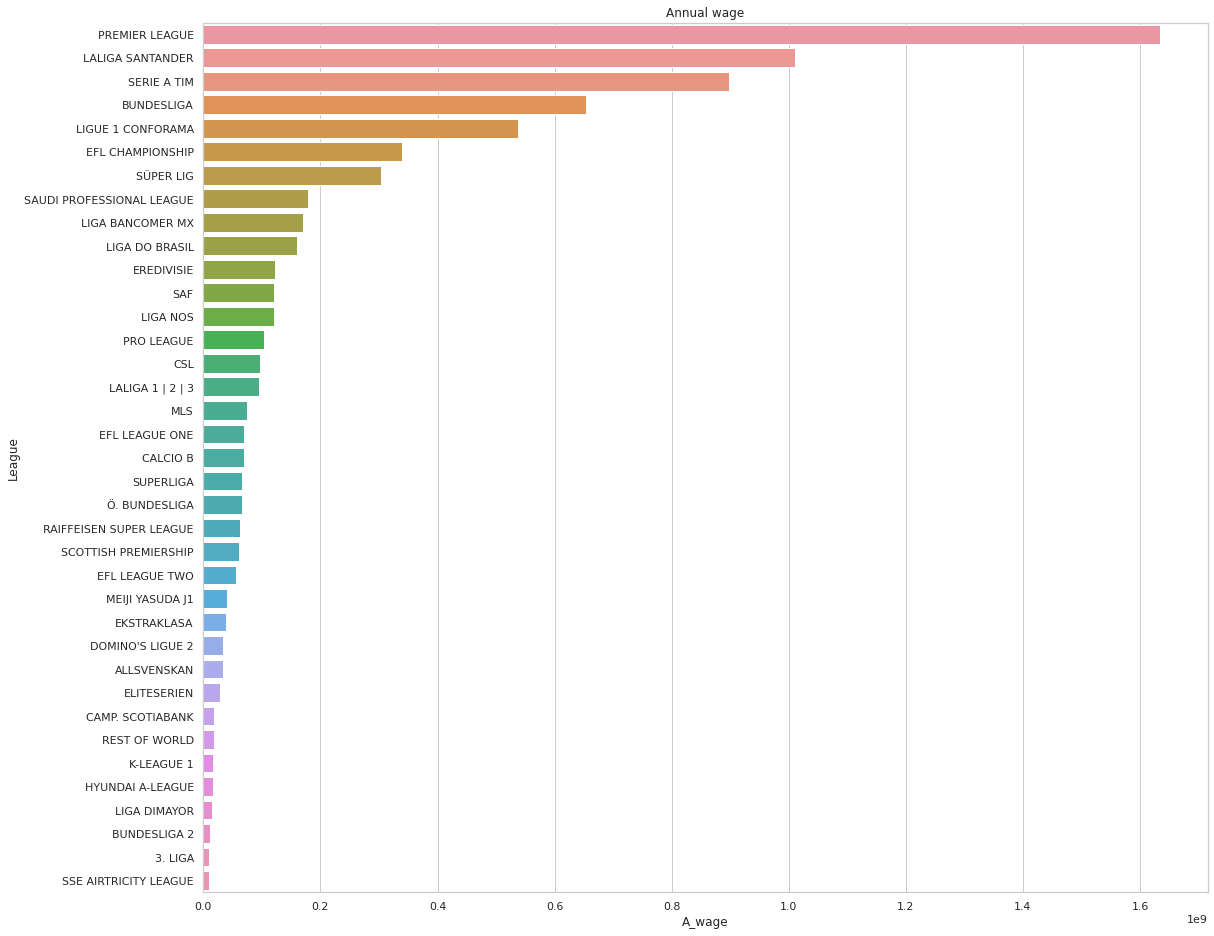

In [33]:
f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x="A_wage", y="League", data=cal_df3)
plt.title('Annual wage')
plt.show()

# Association rule mining

* Association rule mining finds interesting associations and relationships among large sets of data items
* This rule shows how frequently a itemset occurs

**Apriori algorithm**

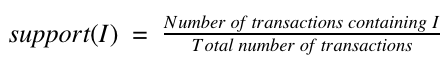

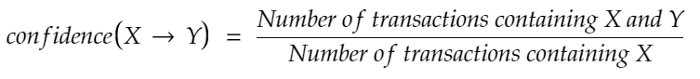

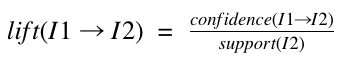

In [34]:
fifa_experiment = fifa_data

In [35]:
fifa_experiment = fifa_experiment.drop(columns=['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'League'],axis=1)
fifa_experiment

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [36]:
for i in fifa_experiment.columns[1:]:
  fifa_experiment[i] = np.where(fifa_experiment[i] > 80, i, 'NaN')
fifa_experiment

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,Crossing,Finishing,NaN,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,NaN,Composure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cristiano Ronaldo,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,NaN,NaN,...,Penalties,Composure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neymar Jr,NaN,Finishing,NaN,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,NaN,...,Penalties,Composure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4,K. De Bruyne,Crossing,Finishing,NaN,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,NaN,Composure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18203,N. Christoffersson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18204,B. Worman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18205,D. Walker-Rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
(rows,columns) = fifa_experiment.head(500).shape

In [38]:
records = []
for i in range(0, rows):
  records.append([str(fifa_experiment.values[i,j]) for j in range(1,columns) if str(fifa_experiment.values[i,j]) != 'NaN' ])

In [39]:
association_rules = apriori(records,min_confidence=0.7, min_length=3)
association_results = list(association_rules)

Attributes which usually occur together

In [40]:
for item in association_results:
    pair = item[2][0][0]
    items = [x for x in pair]
    pair1 = item[2][0][1]
    items1 = [x for x in pair1]
    print("Rule: " + str(items[0:]) + " -> " + str(items1[0:]))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['Acceleration'] -> ['Agility']
Support: 0.218
Confidence: 0.7785714285714285
Lift: 2.63030888030888
Rule: ['Acceleration'] -> ['BallControl']
Support: 0.234
Confidence: 0.8357142857142856
Lift: 1.5650080256821828
Rule: ['Acceleration'] -> ['Dribbling']
Support: 0.228
Confidence: 0.8142857142857143
Lift: 1.9387755102040818
Rule: ['SprintSpeed'] -> ['Acceleration']
Support: 0.194
Confidence: 0.7886178861788619
Lift: 2.8164924506387923
Rule: ['Aggression'] -> ['Interceptions']
Support: 0.18
Confidence: 0.7258064516129032
Lift: 2.668406072106262
Rule: ['Aggression'] -> ['StandingTackle']
Support: 0.184
Confidence: 0.7419354838709677
Lift: 2.440577249575552
Rule: ['Balance'] -> ['Agility']
Support: 0.202
Confidence: 0.8706896551724138
Lift: 2.941519105312209
Rule: ['Agility'] -> ['BallControl']
Support: 0.272
Confidence: 0.9189189189189191
Lift: 1.720821945541047
Rule: ['Agility'] -> ['Dribbling']
Support: 0.264
Confidence: 0.891891891891892
Lift: 2.1235521235521237
Rule: ['Balance']

This inspired me to categorise players according to their specialty 

# Player specialities 

**Criterias for various speciality**

**Poacher**: Finishing: 85+ Heading Accuracy: 85+ Attacking Work Rate: Low or Medium

**Distance Shooter**: Long Shots: 87+ Shot Power: 87+

**Clinical Finisher**: Long Shots: 80+ Finishing: 86+

**Aerial Threat**: Heading Accuracy: 75+ Jumping: 85+ Strength: 85+ Player Height: 188cm+

**Free Kick (FK) Specialist**: FK Accuracy: 86+ Curve: 85+ Shot Power: 85+

**Dribbler: Dribbling**: 86+ Balance: 75+

**Playmaker**: Short Passing: 86+ Long Passing: 73+ Vision: 86+

**Crosser: Crossing**: 86+ Curve: 80+

**Engine: Stamina**: 86+ Attacking Work Rate: High Defensive Work Rate: High

**Tackler: Standing Tackle**: 86+ Sliding Tackle: 85+

**Speedster**: Sprint Speed: 90+ Acceleration: 90+

**Strength**: Strength: 86+ Player Weight: 83kg+

**Tactician**: Interceptions: 86+ Reactions: 80+

**Acrobat: Agility**: 86+ Reactions: 80+

**Complete Forward**: Has Poacher Specialty and at least two of the following: Clinical Finisher Specialty Speedster Specialty Aerial Threat Specialty Dribbler Specialty Strength Specialty Or, if they don’t have Poacher, have Clinical Finisher specialty and at least two of the following Speedster Specialty Aerial Threat Specialty Dribbler Specialty Strength Specialty:

**Complete Midfielder**: Has Playmaker Specialty and at least two of the following: Engine Specialty Crosser Specialty Dribbler Specialty Distance Shooter Specialty Free Kick (FK) Specialist Specialty Clinical Finisher Specialty Tackler Specialty

**Complete Defender**: Has Tackler Specialty and at least one of the following: Acrobat Specialty Strength Specialty Aerial Threat Specialty

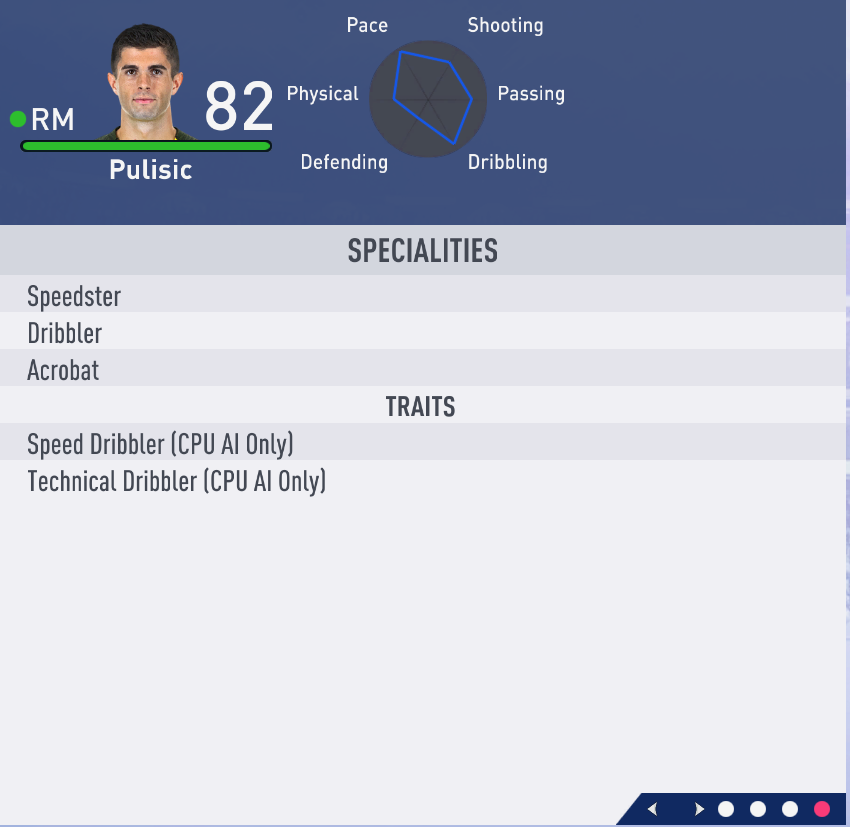

In [41]:
speciality_conditions = [
    ((((fifa_data['Finishing'] > 85) & (fifa_data['HeadingAccuracy'] > 85) & (fifa_data['Work Rate'] != 'High/ High') & (fifa_data['Work Rate'] != 'High/ Low') & (fifa_data['Work Rate'] != 'High/ Medium')) 
     & (((fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86)) | ((fifa_data['SprintSpeed'] > 90) & (fifa_data['Acceleration'] > 90)) | ((fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85)) |
        ((fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75)) | ((fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs')))) | (((fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86)) & 
        (((fifa_data['SprintSpeed'] > 90) & (fifa_data['Acceleration'] > 90)) | ((fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85)) 
        | ((fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75)) | ((fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs'))))),
    (((fifa_data['ShortPassing'] > 86) & (fifa_data['LongPassing'] > 73) & (fifa_data['Vision'] > 86)) & (((fifa_data['Stamina'] > 86) & (fifa_data['Work Rate'] == 'High/ High')) 
    | ((fifa_data['Crossing'] > 86) & (fifa_data['Curve'] > 80)) | ((fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75)) | ((fifa_data['LongShots'] > 87) & (fifa_data['ShotPower'] > 87)) 
    | ((fifa_data['FKAccuracy'] > 86) & (fifa_data['Curve'] > 85) & (fifa_data['ShotPower'] > 85)) | ((fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86)) 
    | ((fifa_data['StandingTackle'] > 86) & (fifa_data['SlidingTackle'] > 85)))),
    (((fifa_data['StandingTackle'] > 86) & (fifa_data['SlidingTackle'] > 85)) & (((fifa_data['Agility'] > 86) & (fifa_data['Reactions'] > 80)) | ((fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs')) 
    | ((fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85)))),
    (fifa_data['Finishing'] > 85) & (fifa_data['HeadingAccuracy'] > 85) & (fifa_data['Work Rate'] != 'High/ High') & (fifa_data['Work Rate'] != 'High/ Low') & (fifa_data['Work Rate'] != 'High/ Medium'),
    (fifa_data['LongShots'] > 87) & (fifa_data['ShotPower'] > 87),
    (fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86),
    (fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85), 
    (fifa_data['FKAccuracy'] > 86) & (fifa_data['Curve'] > 85) & (fifa_data['ShotPower'] > 85),
    (fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75),
    (fifa_data['ShortPassing'] > 86) & (fifa_data['LongPassing'] > 73) & (fifa_data['Vision'] > 86),
    (fifa_data['Crossing'] > 86) & (fifa_data['Curve'] > 80),
    (fifa_data['Stamina'] > 86) & (fifa_data['Work Rate'] == 'High/ High'),
    (fifa_data['StandingTackle'] > 86) & (fifa_data['SlidingTackle'] > 85),
    (fifa_data['SprintSpeed'] > 90) & (fifa_data['Acceleration'] > 90),
    (fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs'),
    (fifa_data['Interceptions'] > 86) & (fifa_data['Reactions'] > 80),
    (fifa_data['Agility'] > 86) & (fifa_data['Reactions'] > 80),
    (fifa_data['Position'] == 'GK')
    

    ]

speciality_values = ['Complete Forward', 'Complete Midfielder', 'Complete Defender', 'Poacher', 'Distance Shooter', 'Clinical Finisher', 'Aerial Threat', 'Free Kick Specialist', 'Dribbler', 'Playmaker', 'Crosser', 'Engine', 
                     'Tackler', 'Speedster', 'Strength', 'Tactician', 'Acrobat', 'Goalkeeper'  ]

fifa_data['Speciality'] = np.select(speciality_conditions, speciality_values)

In [42]:
fifa_data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,EFL LEAGUE TWO,0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,ALLSVENSKAN,0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,0,0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,EFL LEAGUE TWO,0


No. of players with different specialty

In [43]:
fifa_data['Speciality'].value_counts()

0                       15225
Goalkeeper               2025
Strength                  440
Engine                    195
Speedster                 105
Dribbler                   57
Acrobat                    15
Complete Midfielder        13
Aerial Threat              11
Tactician                  10
Crosser                    10
Tackler                    10
Complete Forward            9
Playmaker                   7
Clinical Finisher           5
Complete Defender           5
Distance Shooter            3
Free Kick Specialist        1
Poacher                     1
Name: Speciality, dtype: int64

In [44]:
fifa_data['Speciality'] = np.where((fifa_data.Speciality == '0'), 'No Speciality', fifa_data.Speciality)

Specialty graph

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Strength'),
  Text(1, 0, 'Engine'),
  Text(2, 0, 'Speedster'),
  Text(3, 0, 'Dribbler'),
  Text(4, 0, 'Acrobat'),
  Text(5, 0, 'Complete Midfielder'),
  Text(6, 0, 'Aerial Threat'),
  Text(7, 0, 'Tactician'),
  Text(8, 0, 'Crosser'),
  Text(9, 0, 'Tackler'),
  Text(10, 0, 'Complete Forward'),
  Text(11, 0, 'Playmaker'),
  Text(12, 0, 'Clinical Finisher'),
  Text(13, 0, 'Complete Defender'),
  Text(14, 0, 'Distance Shooter'),
  Text(15, 0, 'Free Kick Specialist'),
  Text(16, 0, 'Poacher')])

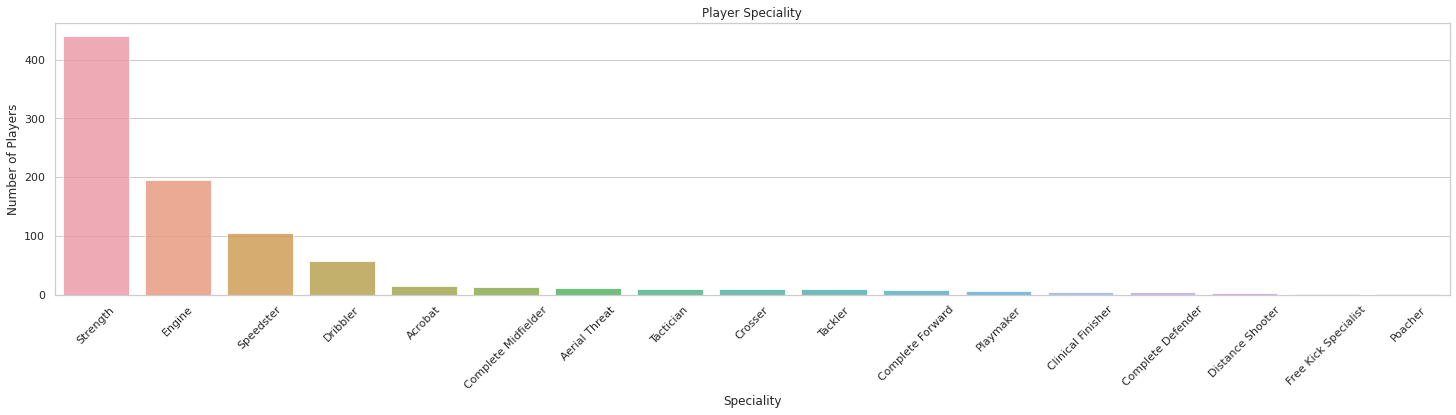

In [45]:
speciality_count = fifa_data['Speciality'].value_counts()
speciality_count = speciality_count[2:]
plt.figure(figsize=(25,5))
g = sns.barplot(speciality_count.index, speciality_count.values, alpha = 0.8)
plt.title('Player Speciality')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('Speciality', fontsize=12)
plt.xticks(rotation=45)

# Clustering

* Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups
* K means is an iterative clustering algorithm that aims to find local maxima in each iteration

Finding the number of clusters we need

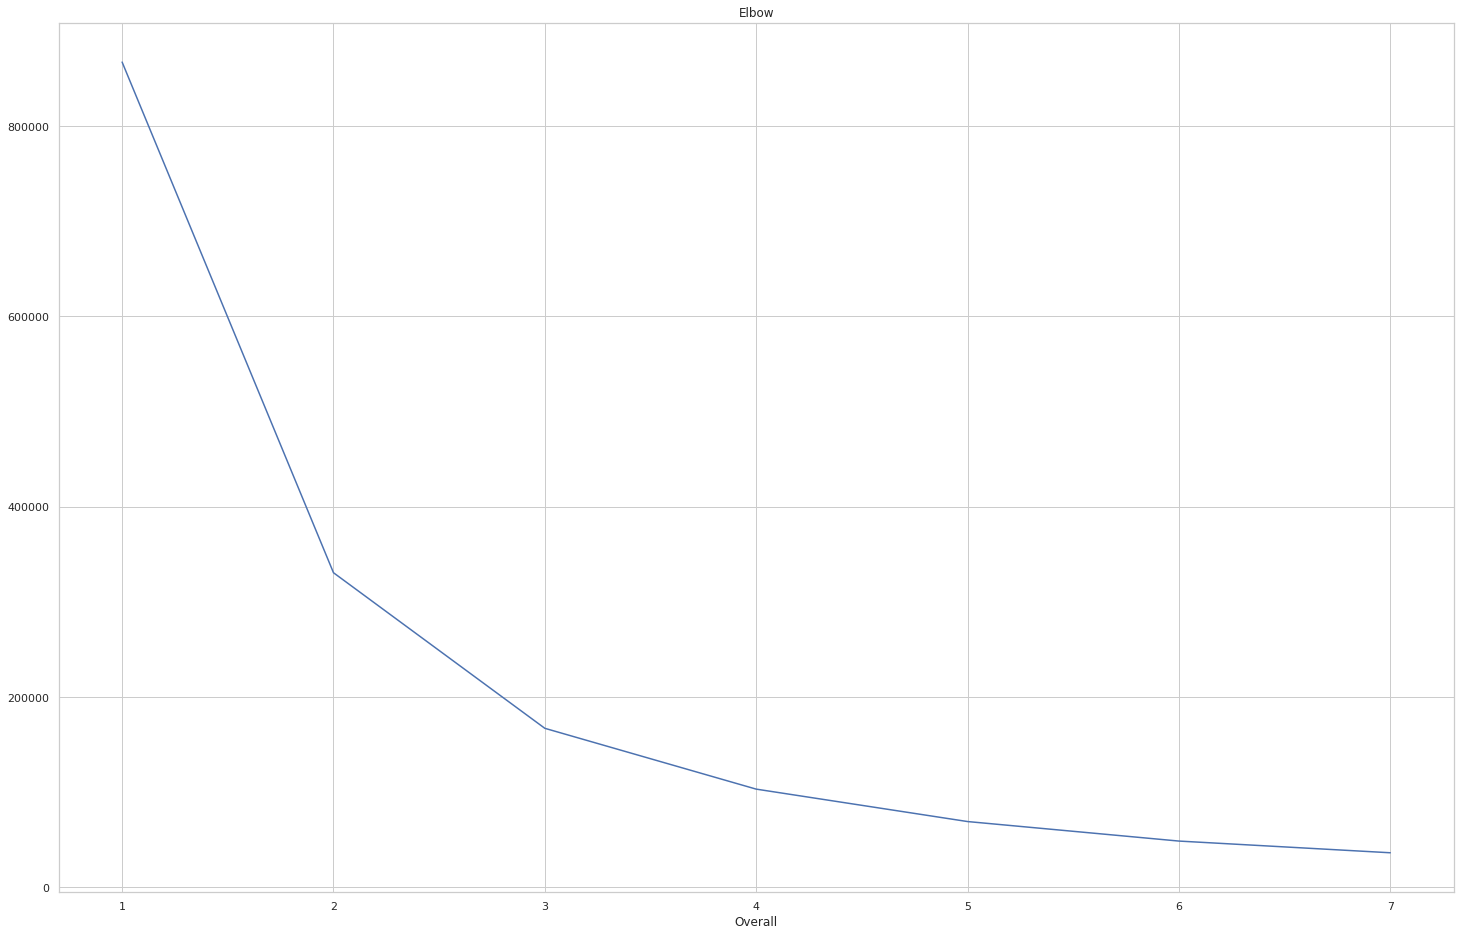

In [46]:
el1 =[]
for i in range (1,8):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(fifa_data.iloc[:,[3]])
  el1.append(kmeans.inertia_)
plt.plot(range (1,8),el1)
plt.title("Elbow")
plt.xlabel("Overall") 
plt.show()

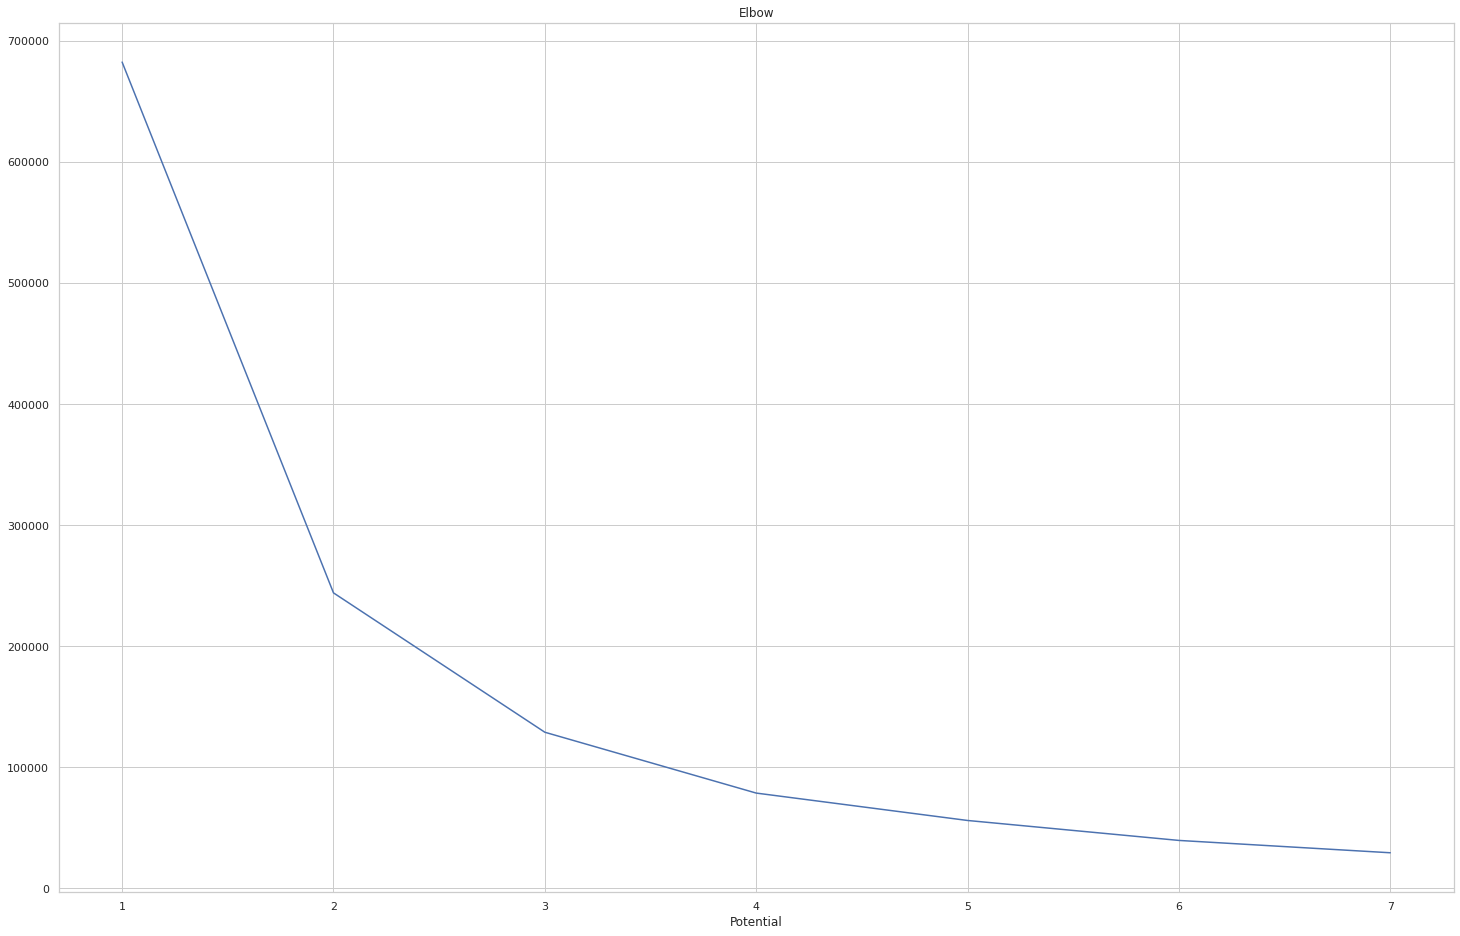

In [47]:
el2 =[]
for i in range (1,8):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(fifa_data.iloc[:,[4]])
  el2.append(kmeans.inertia_)
plt.plot(range (1,8),el2)
plt.title("Elbow")
plt.xlabel("Potential") 
plt.show()

Required clusters

<AxesSubplot:xlabel='Overall', ylabel='Potential'>

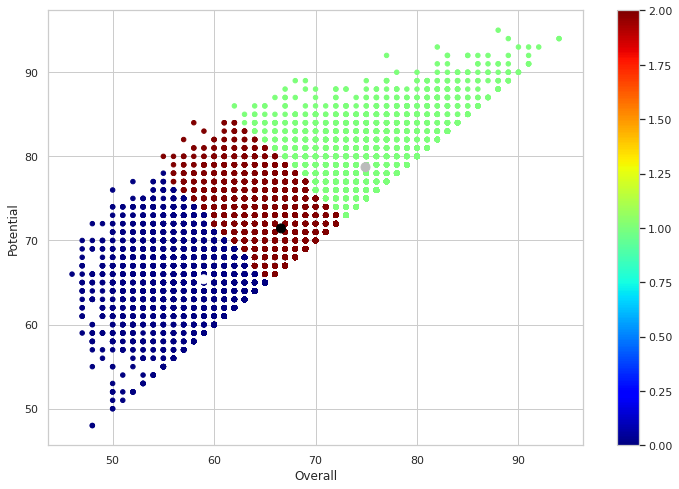

In [48]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(fifa_data.iloc[:,[4,3]])
clust = pd.DataFrame(kmeans.cluster_centers_, columns = list(fifa_data.iloc[:,[4,3]].columns.values))
fig, ax = plt.subplots(1,1)
fifa_data.plot.scatter(x='Overall', y='Potential',c=kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax,mark_right=False  )
clust.plot.scatter(x='Overall', y='Potential', ax=ax, s=80, mark_right=False)

# Classification

* Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data
* Classification requires a training dataset with many examples of inputs and outputs from which to learn
* A model will use the training dataset and will calculate how to best map examples of input data to specific class labels
* Classification predictive modeling algorithms are evaluated based on their results
* Classification accuracy is a popular metric used to evaluate the performance of a model based on the predicted class labels

In [49]:
feat_col = ['Age', 'Overall', 'Potential','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes' ]
X = fifa_data[feat_col]                  #feat values
y = fifa_data.Speciality                 #Target Variable

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Predicting player specialty

In [51]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)       #Training
y_pred = clf.predict(X_test)          #Predicting target variable 
print(y_pred)

['No Speciality' 'Engine' 'No Speciality' ... 'No Speciality'
 'No Speciality' 'No Speciality']


In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9746556473829201


# Coach's player potential guide

Checking a players current rating amd potential to find scope of improvement

In [53]:
def player_pot(club_name):
  sns.set(style="whitegrid")
  f, ax = plt.subplots(figsize=(6, 16))

  sns.set_color_codes("pastel")
  sns.barplot(x="Potential", y="Name", data=fifa_data.loc[fifa_data['Club'] == club_name],
            label="Potential", color="b")
  sns.set_color_codes("muted")
  sns.barplot(x="Overall", y="Name", data=fifa_data.loc[fifa_data['Club'] == club_name],
            label="Overall", color="b")


  ax.legend(ncol=2, bbox_to_anchor=(1.75, 0.5),frameon=True)

Select any club to see all the players along with their overall and potential

In [54]:
interact(player_pot, club_name = fifa_data.Club)

interactive(children=(Dropdown(description='club_name', options=('FC Barcelona', 'Juventus', 'Paris Saint-Germ…

<function __main__.player_pot(club_name)>

Callum Hudson-Odoi at the start of first season

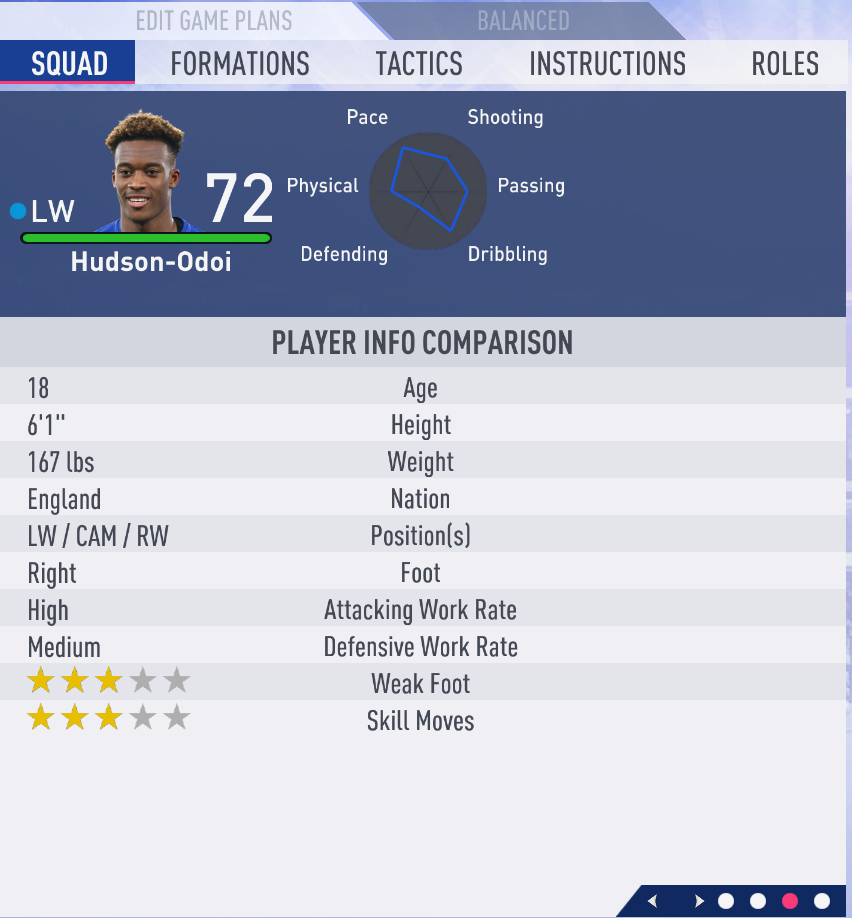

Callum Hudson-Odoi after a few seasons fulfilling his potential

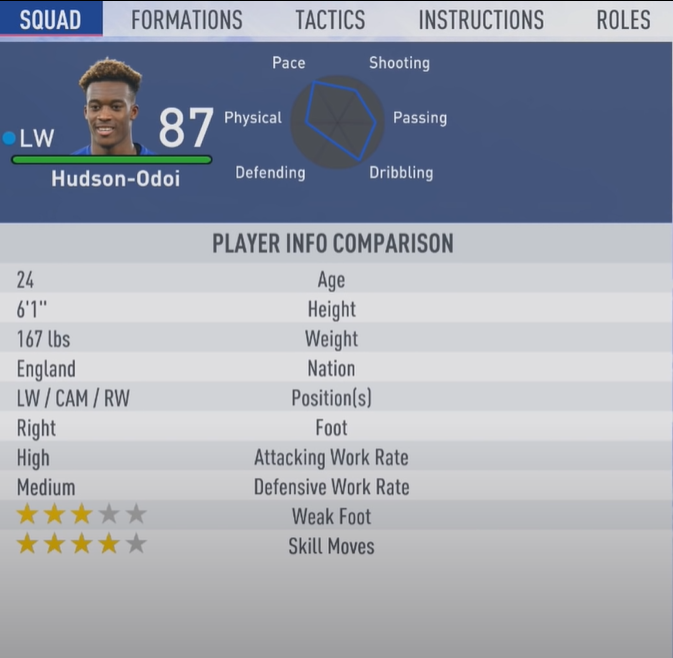

# Player Scouting

Scouting is the process of evaluating the talent of footballers with a view to sign them.
Sometimes scouting can be an expensive process and finding replacement for players isn't easy either.

In [55]:
normalized_data = fifa_data

In [56]:
normalized_data = normalized_data.drop(columns=['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Release Clause', 'League','Height', 'Weight', 'Speciality', 'Name', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1)

Normalizing data

In [57]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(normalized_data)
normalized_data.loc[:,:] = scaled_values
normalized_data['Name'] = fifa_data['Name']
col_name = "Name"
first_col = normalized_data.pop(col_name)
normalized_data.insert(0, col_name, first_col)
normalized_data

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,0.897727,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.928571,...,1.000000,0.440476,0.213483,0.989247,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364
1,Cristiano Ronaldo,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.802198,0.809524,...,0.989011,0.619048,0.292135,1.000000,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273
2,Neymar Jr,0.840909,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,0.923077,0.821429,...,0.868132,0.535714,0.370787,0.935484,0.916667,0.873563,0.978495,0.263736,0.241758,0.340909
3,De Gea,0.136364,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,0.175824,0.500000,...,0.098901,0.321429,0.303371,0.107527,0.690476,0.402299,0.698925,0.131868,0.208791,0.113636
4,K. De Bruyne,1.000000,0.860215,0.566667,0.988372,0.906977,0.881720,0.897727,0.879121,0.976190,...,0.967033,0.773810,0.651685,0.913978,1.000000,0.850575,0.913978,0.714286,0.615385,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,0.329545,0.387097,0.400000,0.488372,0.244186,0.408602,0.272727,0.340659,0.428571,...,0.384615,0.416667,0.483146,0.397849,0.500000,0.436782,0.451613,0.406593,0.505495,0.500000
18203,N. Christoffersson,0.204545,0.537634,0.533333,0.418605,0.372093,0.376344,0.295455,0.186813,0.190476,...,0.428571,0.428571,0.146067,0.473118,0.273810,0.436782,0.419355,0.208791,0.142857,0.181818
18204,B. Worman,0.227273,0.408602,0.466667,0.360465,0.395349,0.440860,0.363636,0.263736,0.226190,...,0.461538,0.250000,0.134831,0.494624,0.392857,0.574713,0.408602,0.318681,0.120879,0.090909
18205,D. Walker-Rice,0.443182,0.516129,0.388889,0.406977,0.418605,0.505376,0.318182,0.318681,0.273810,...,0.340659,0.261905,0.213483,0.451613,0.440476,0.517241,0.462366,0.186813,0.252747,0.272727


**Finding similar players on the basis of various attributes**

In [58]:
def get_similar_players(player_name):
  player_index = [list(normalized_data['Name']).index(x) for x in list(normalized_data['Name']) if player_name in x]
  player_index = int(player_index[0])
  # print(player_index)
  df = normalized_data.iloc[:,1:]
  cos = cosine_similarity(df, df)
  player_cos = sorted(list(cos[player_index]))[-4:-1]
  indexes = [list(cos[player_index]).index(x) for x in player_cos]
  indexes.append(player_index)
  plot_df = normalized_data.iloc[indexes]
  plot_df1 = plot_df
  plot_df1.reset_index(drop=True, inplace=True)
  plot_df1.reindex(index=range(0,5))
  plot_categories = list(plot_df1)[1:]
  plot_values = plot_df1.mean().values.flatten().tolist()
  plot_values += values[:1]
  angles = [n/ float(len(plot_categories)) *2 * pi for n in range(len(plot_categories))]
  angles += angles[:1]
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10),subplot_kw=dict(polar=True))
  plt.xticks(angles[:-1], plot_categories, color='grey', size=12)
  plt.yticks(np.arange(0.0, 1.2,0.2), ['0', '20','40','60','80','100'],color='grey', size=12)
  plt.ylim(0, 1)
  ax.set_rlabel_position(30)
  for i in range(len(plot_df1)):
    val_c1 = plot_df1.loc[i].drop('Name').values.flatten().tolist()
    val_c1 += val_c1[:1]
    ax.plot(angles, val_c1, linewidth=1.5, linestyle='solid',label=plot_df1.loc[i]["Name"])
    ax.fill(angles, val_c1, alpha=0.1)
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  return player_cos, normalized_data.iloc[indexes], plt.show()

Select any player from the dropdown to find 3 similar players. This can be helpful while finding replacement for a player.

(Very helpful for FIFA 19 career mode aswell 😝)

In [59]:
interact(get_similar_players, player_name = normalized_data.Name)

interactive(children=(Dropdown(description='player_name', options=('L. Messi', 'Cristiano Ronaldo', 'Neymar Jr…

<function __main__.get_similar_players(player_name)>

***If you made it this far, Please upvote the kernel if you like it. It motivates me to make more quality content.*** 

<img src="https://i2-prod.mirror.co.uk/incoming/article13565233.ece/ALTERNATES/s615b/1_Ligue-1-Paris-St-Germain-v-Angers.jpg">
